In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install imblearn

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Understanding the Dataset

## Loading the Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis

In [5]:
df.shape
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


A lot of these features are actually categorical which are being treated as numerical. We need to convert them to categorical

In [7]:
df.isna().sum()
df.duplicated().sum()


23899

There are 23899 rows which are duplicated, we need to drop these rows.

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

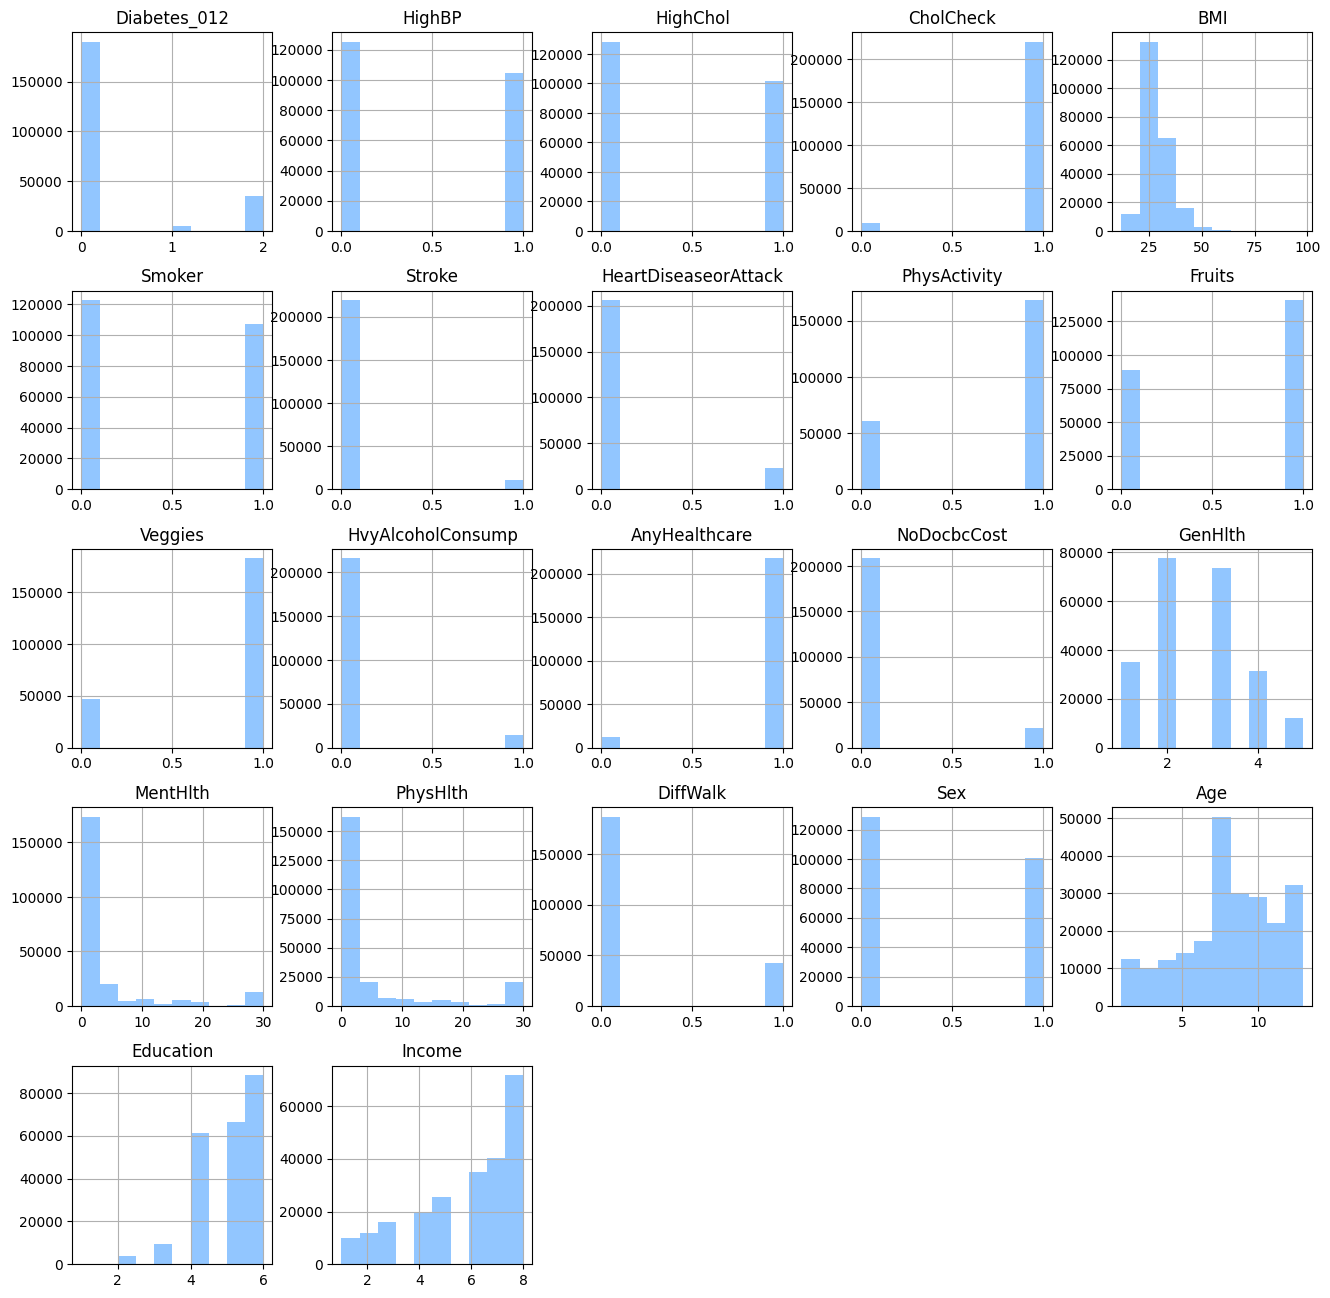

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
df.hist(figsize=(16, 16))

<Axes: title={'center': 'Correlation with Diabetes Column'}>

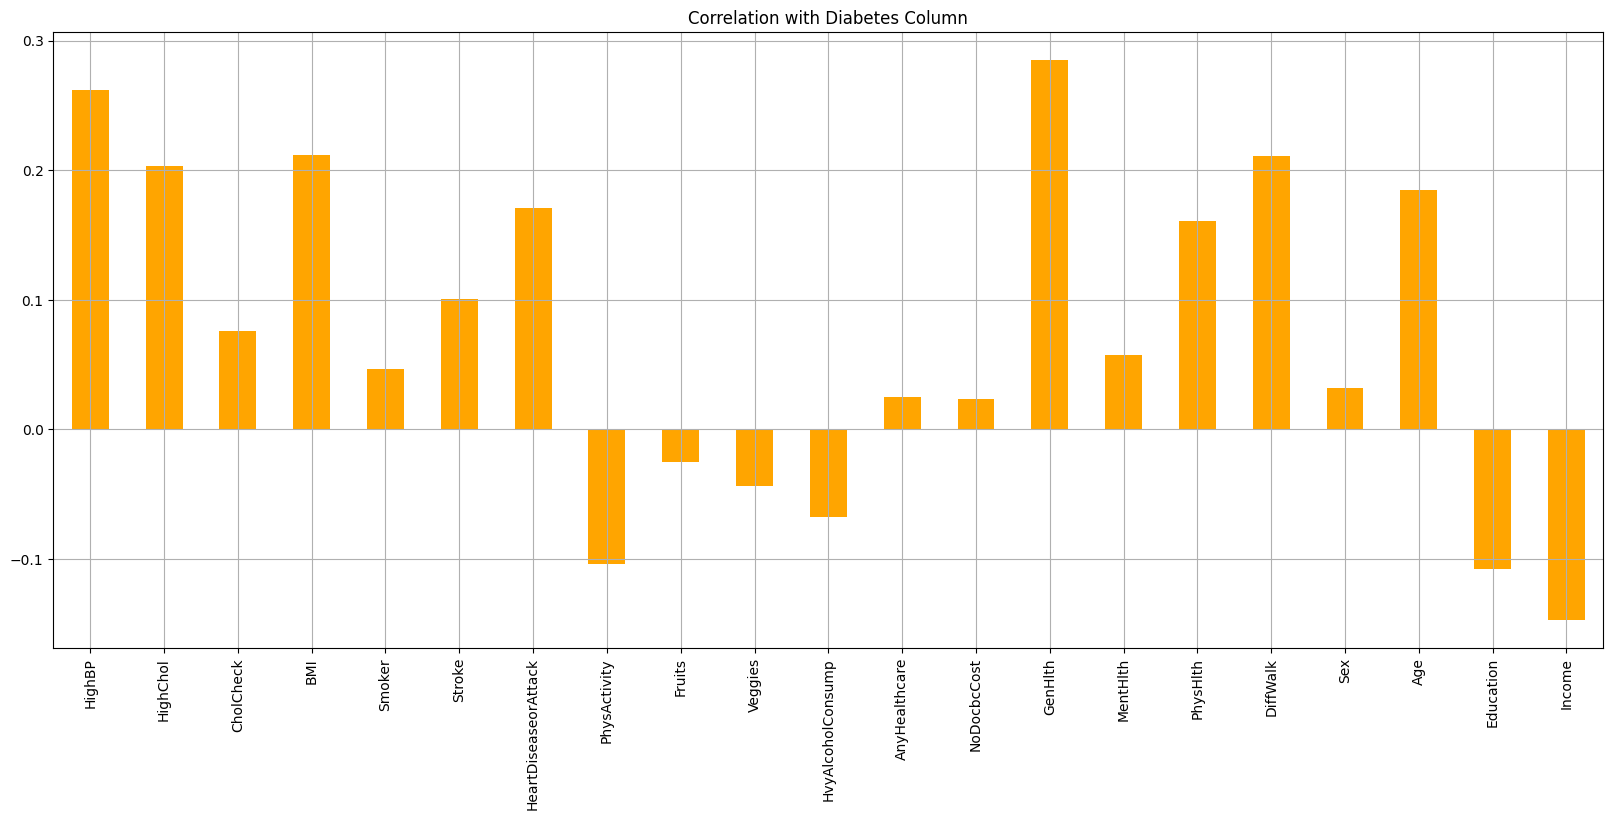

In [10]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Column", color='orange')

The considerable correlations with Diabetes column are General Health (1-5), Physical Health, BMI and High BP

<Axes: xlabel='Diabetes_012', ylabel='count'>

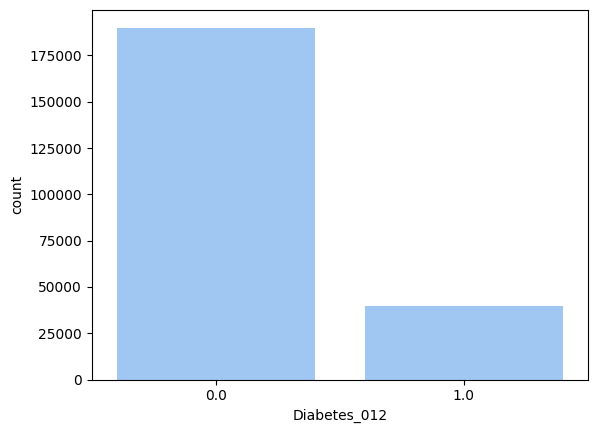

In [11]:
df['Diabetes_012'] = df['Diabetes_012'].replace(2, 1)

# Count occurrences of 0 and 1
counts = df['Diabetes_012'].value_counts()

sns.countplot(data=df, x='Diabetes_012')

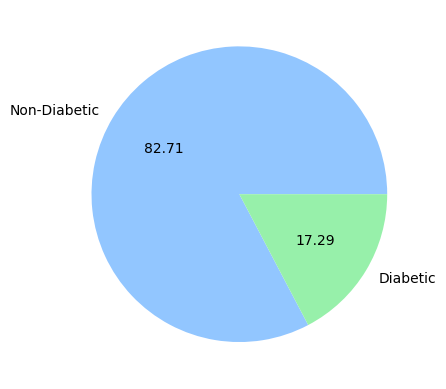

In [12]:
labels=['Non-Diabetic', 'Diabetic']
plt.pie(df["Diabetes_012"].value_counts() ,labels=labels, autopct='%.02f' );

There is high class imbalance. To be precise we need to run value_counts method.

In [13]:
df.Diabetes_012.value_counts()

,count
Diabetes_012,
0.0,190055
1.0,39726


## Converting Discrete Features in Categories

In [14]:
binary_columns = df.columns[(df.nunique() == 2)].tolist()
binary_columns

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

In [15]:
df[binary_columns] = df[binary_columns].astype(int)

# Preprocessing

## Feature Scaling

BMI: The BMI feature has a wide range (min: 12.0, max: 98.0). Since it's a numeric feature with varying scales, it should be scaled.

GenHlth: This feature ranges from 1.0 to 5.0, representing different health states. Though the range is relatively small, scaling might still help in models sensitive to feature scales (like k-NN or SVM).

MentHlth and PhysHlth: These features have a range from 0 to 30, indicating the number of unhealthy days. Scaling can ensure these features don't dominate models like Logistic Regression.

Age: The Age feature ranges from 1.0 to 13.0. Even though the range is smaller, normalizing it can be beneficial for models sensitive to scale.

Income: The Income feature ranges from 1.0 to 8.0. This feature might also benefit from scaling, especially if it's used alongside other features with smaller ranges.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']] = scaler.fit_transform(df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']])

In [17]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,0.325581,1,0,0,0,0,...,1,0,1.00,0.6,0.5,1,0,0.666667,4.0,0.285714
1,0,0,0,0,0.151163,1,0,0,1,0,...,0,1,0.50,0.0,0.0,0,0,0.500000,6.0,0.000000
2,0,1,1,1,0.186047,0,0,0,0,1,...,1,1,1.00,1.0,1.0,1,0,0.666667,4.0,1.000000
3,0,1,0,1,0.174419,0,0,0,1,1,...,1,0,0.25,0.0,0.0,0,0,0.833333,3.0,0.714286
4,0,1,1,1,0.139535,0,0,0,1,1,...,1,0,0.25,0.1,0.0,0,0,0.833333,5.0,0.428571


## Handling Class Imbalance

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,StratifiedKFold


X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']               # Target variable


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results
fold_accuracies = []


In [22]:
!pip install XGBoost
!pip install lightgbm

In [26]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int64


In [28]:
from re import M
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    # "Naive Bayes": GaussianNB(var_smoothing=1e-9),
    # "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=200),
    # "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    # "Passive Aggressive": PassiveAggressiveClassifier(C=1, max_iter=1000),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
    # "Neural Network (1 layer)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, activation='relu', solver='adam'),
    # "DNN (5 hidden layers)": MLPClassifier(hidden_layer_sizes=(64, 64, 32, 32, 16), max_iter=500, activation='relu', solver='adam', alpha=0.0001),
    # "SVM": SVC(C=1, kernel='rbf', gamma=0.1, probability=True)
}


fold_accuracies = {
    "Decision Tree": [],
    "Random Forest": [],
    # "Naive Bayes":[],
    # "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=200),
    # "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
    # "Gradient Boosting": [],
    # "Passive Aggressive":[],
    "XGBoost": [],
    "LightGBM": []
    # "Neural Network (1 layer)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, activation='relu', solver='adam'),
    # "DNN (5 hidden layers)": MLPClassifier(hidden_layer_sizes=(64, 64, 32, 32, 16), max_iter=500, activation='relu', solver='adam', alpha=0.0001),
    # "SVM": SVC(C=1, kernel='rbf', gamma=0.1, probability=True)
}


fold_f1_scores = fold_accuracies.copy()
prec= fold_accuracies.copy()
rec= fold_accuracies.copy()
roc_auc= fold_accuracies.copy()
conf_mat= fold_accuracies.copy()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Apply SMOTE only on the training set
  X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
  print(f"Training Features Shape: {X_resampled.shape}")
  print(f"Test Features Shape: {X_test.shape}")
  print(f"Training Labels Shape: {y_resampled.shape}")
  print(f"Test Labels Shape: {y_test.shape}")


  for keys in models:
    models[keys].fit(X_resampled, y_resampled)

    y_pred = models[keys].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{keys} Accuracy: {accuracy}")



    y_proba = models[keys].predict_proba(X_test)[:, 1] #if hasattr(models[keys], "predict_proba") else None
    AOC = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else np.nan

    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion= confusion_matrix(y_test, y_pred)

    print(f"{keys} Accuracy: {accuracy}")
    print(f"{keys} F1 Score: {f1}")
    print(f"{keys} Precision: {precision}")
    print(f"{keys} Recall: {recall}")
    print(f"{keys} Confusion Matrix: {confusion}")
    print(f"{keys} ROC AUC: {AOC}")


    fold_accuracies[keys].append(accuracy)
    fold_f1_scores[keys].append(f1)
    prec[keys].append(precision)
    rec[keys].append(recall)
    roc_auc[keys].append(AOC)
    conf_mat[keys].append(confusion)








Training Features Shape: (304088, 21)
Test Features Shape: (45957, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45957,)
Decision Tree Accuracy: 0.7848423526339839
Decision Tree Accuracy: 0.7848423526339839
Decision Tree F1 Score: 0.7924928155289687
Decision Tree Precision: 0.8021473729853555
Decision Tree Recall: 0.7848423526339839
Decision Tree Confusion Matrix: [[32252  5759]
 [ 4129  3817]]
Decision Tree ROC AUC: 0.7765142954796498
Random Forest Accuracy: 0.8037730922383968
Random Forest Accuracy: 0.8037730922383968
Random Forest F1 Score: 0.8075429248111479
Random Forest Precision: 0.8118781903805755
Random Forest Recall: 0.8037730922383968
Random Forest Confusion Matrix: [[33089  4922]
 [ 4096  3850]]
Random Forest ROC AUC: 0.7993738985686996
XGBoost Accuracy: 0.8297103814435233
XGBoost Accuracy: 0.8297103814435233
XGBoost F1 Score: 0.8132287631754559
XGBoost Precision: 0.8065771221501987
XGBoost Recall: 0.8297103814435233
XGBoost Confusion Matrix: [[35591  2420]
 [ 54

In [ ]:
# Function to calculate and print the mean of metrics
print(rec)
def print_mean_metrics(metrics_dict, metric_name):
    print(f"\n--- Average {metric_name} for Each Model ---")
    for model_name, values in metrics_dict.items():
        mean_value = np.mean(values[0:5])
        print(f"{model_name}: {mean_value:.4f}")

# # Print average metrics
# print_mean_metrics(fold_accuracies, "Accuracy")
# print_mean_metrics(fold_f1_scores, "F1-Score")
# print_mean_metrics(prec, "Precision")
# print_mean_metrics(rec, "Recall")
# print_mean_metrics(roc_auc, "ROC-AUC")

{'Decision Tree': [0.7761603237809257, 0.78179665512086, 0.7904534977137749, 0.7761603237809257, 0.6630290543855085, array([[32257,   309,  5445],
       [  631,    13,   282],
       [ 3513,   107,  3400]]), 0.7660153190007833, 0.7759711942985462, 0.7891779481671276, 0.7660153190007833, 0.668035144626092, array([[31907,   530,  5574],
       [  566,    44,   315],
       [ 3492,   276,  3252]]), 0.7734789798938114, 0.7794658537646494, 0.7906581610648524, 0.7734789798938114, 0.6689338488404982, array([[32016,   104,  5891],
       [  576,     8,   342],
       [ 3467,    30,  3522]]), 0.7658629993907216, 0.7756336977949826, 0.7903383414394072, 0.7658629993907216, 0.6658330000440555, array([[31712,   363,  5936],
       [  566,    20,   340],
       [ 3395,   160,  3464]]), 0.7697797893637393, 0.7786901468836753, 0.7908596834296255, 0.7697797893637393, 0.6605655788587642, array([[31958,   610,  5443],
       [  604,    25,   297],
       [ 3476,   150,  3393]])], 'Random Forest': [0.795

In [29]:
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Define base models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    # "Naive Bayes": GaussianNB(var_smoothing=1e-9),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
}

# Define the voting classifier for Major Voting Ensemble
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')

# Initialize dictionaries to store performance metrics
fold_accuracies = {model: [] for model in models}
fold_f1_scores = {model: [] for model in models}
prec = {model: [] for model in models}
rec = {model: [] for model in models}
roc_auc = {model: [] for model in models}
conf_mat = {model: [] for model in models}

# Iterate over folds for training and evaluation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only on the training set
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print(f"Training Features Shape: {X_resampled.shape}")
    print(f"Test Features Shape: {X_test.shape}")
    print(f"Training Labels Shape: {y_resampled.shape}")
    print(f"Test Labels Shape: {y_test.shape}")

    # Train individual models and the ensemble
    # for name, model in models.items():
    #     model.fit(X_resampled, y_resampled)

    # Fit the voting classifier (Majority Vote Ensemble)
    voting_clf.fit(X_resampled, y_resampled)

    # Get predictions from each model and the ensemble
    # individual_predictions = np.array([model.predict(X_test) for model in models.values()])
    ensemble_predictions = voting_clf.predict(X_test)

    # Evaluate individual models and the ensemble
    # for i, (name, model) in enumerate(models.items()):
    #     y_pred = individual_predictions[i]

    #     accuracy = accuracy_score(y_test, y_pred)
    #     f1 = f1_score(y_test, y_pred, average='weighted')
    #     precision = precision_score(y_test, y_pred, average='weighted')
    #     recall = recall_score(y_test, y_pred, average='weighted')
    #     y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    #     AOC = roc_auc_score(y_test, y_proba, multi_class='ovo') if y_proba is not None else np.nan
    #     confusion = confusion_matrix(y_test, y_pred)

    #     print(f"{name} Accuracy: {accuracy}")
    #     print(f"{name} F1 Score: {f1}")
    #     print(f"{name} Precision: {precision}")
    #     print(f"{name} Recall: {recall}")
    #     print(f"{name} Confusion Matrix: {confusion}")
    #     print(f"{name} ROC AUC: {AOC}")

    #     fold_accuracies[name].append(accuracy)
    #     fold_f1_scores[name].append(f1)
    #     prec[name].append(precision)
    #     rec[name].append(recall)
    #     roc_auc[name].append(AOC)
    #     conf_mat[name].append(confusion)

    # Evaluate Ensemble's performance
    accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
    f1_ensemble = f1_score(y_test, ensemble_predictions, average='weighted')
    precision_ensemble = precision_score(y_test, ensemble_predictions, average='weighted')
    recall_ensemble = recall_score(y_test, ensemble_predictions, average='weighted')
    y_proba_ensemble = voting_clf.predict_proba(X_test)[:, 1] if hasattr(voting_clf, "predict_proba") else None
    AOC_ensemble = roc_auc_score(y_test, y_proba_ensemble, multi_class='ovo') if y_proba_ensemble is not None else np.nan
    confusion_ensemble = confusion_matrix(y_test, ensemble_predictions)

    print(f"Ensemble Accuracy: {accuracy_ensemble}")
    print(f"Ensemble F1 Score: {f1_ensemble}")
    print(f"Ensemble Precision: {precision_ensemble}")
    print(f"Ensemble Recall: {recall_ensemble}")
    print(f"Ensemble Confusion Matrix: {confusion_ensemble}")
    print(f"Ensemble ROC AUC: {AOC_ensemble}")


Training Features Shape: (304088, 21)
Test Features Shape: (45957, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45957,)
[LightGBM] [Info] Number of positive: 152044, number of negative: 152044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 304088, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Ensemble Accuracy: 0.8290575973192332
Ensemble F1 Score: 0.8129091636534755
Ensemble Precision: 0.8061501726110463
Ensemble Recall: 0.8290575973192332
Ensemble Confusion Matrix: [[35548  2463]
 [ 5393  2553]]
Ensemble ROC AUC: nan
Training Features Shape: (304088, 21)
Test Features Shape: (45956, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45956,)

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize the models array
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
}

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Define the base models for the ensemble
base_estimators = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt')),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
]

# Combine models into a VotingClassifier or StackingClassifier
voting_clf = VotingClassifier(estimators=base_estimators, voting='soft')  # Soft voting takes the average of predicted probabilities

# or alternatively, use StackingClassifier:
# stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Iterate through each fold in the cross-validation
for model_name, base_estimator in models.items():
    print(f"Training with {model_name}")

    fold_accuracies = []
    fold_f1_scores = []
    fold_precision = []
    fold_recall = []
    fold_roc_auc = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE only on the training set
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Train the VotingClassifier or StackingClassifier
        voting_clf.fit(X_resampled, y_resampled)

        # Get predictions from the ensemble
        ensemble_predictions = voting_clf.predict(X_test)

        # Evaluate Ensemble's performance
        accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
        f1_ensemble = f1_score(y_test, ensemble_predictions, average='weighted')
        precision_ensemble = precision_score(y_test, ensemble_predictions, average='weighted')
        recall_ensemble = recall_score(y_test, ensemble_predictions, average='weighted')
        y_proba_ensemble = voting_clf.predict_proba(X_test)[:, 1] if hasattr(voting_clf, "predict_proba") else None
        roc_auc_ensemble = roc_auc_score(y_test, y_proba_ensemble) if y_proba_ensemble is not None else np.nan

        # Store results for later
        fold_accuracies.append(accuracy_ensemble)
        fold_f1_scores.append(f1_ensemble)
        fold_precision.append(precision_ensemble)
        fold_recall.append(recall_ensemble)
        fold_roc_auc.append(roc_auc_ensemble)

    # Calculate and display average performance metrics
    print(f"\nResults for AdaBoost with {model_name} as base estimator:")
    print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
    print(f"Average F1 Score: {np.mean(fold_f1_scores):.4f}")
    print(f"Average Precision: {np.mean(fold_precision):.4f}")
    print(f"Average Recall: {np.mean(fold_recall):.4f}")
    print(f"Average ROC AUC: {np.mean(fold_roc_auc):.4f}\n")


Training with Decision Tree
[LightGBM] [Info] Number of positive: 152044, number of negative: 152044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 304088, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 152044, number of negative: 152044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 304088, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScor

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize the models array
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
}

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Define the base models for the ensemble
base_estimators = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt')),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
]

# Combine models into a VotingClassifier or StackingClassifier
# voting_clf = VotingClassifier(estimators=base_estimators, voting='soft')  # Soft voting takes the average of predicted probabilities

# or alternatively, use StackingClassifier:
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Iterate through each fold in the cross-validation
for model_name, base_estimator in models.items():
    print(f"Training with {model_name}")

    fold_accuracies = []
    fold_f1_scores = []
    fold_precision = []
    fold_recall = []
    fold_roc_auc = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE only on the training set
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Train the VotingClassifier or StackingClassifier
        stacking_clf.fit(X_resampled, y_resampled)

        # Get predictions from the ensemble
        ensemble_predictions = stacking_clf.predict(X_test)

        # Evaluate Ensemble's performance
        accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
        f1_ensemble = f1_score(y_test, ensemble_predictions, average='weighted')
        precision_ensemble = precision_score(y_test, ensemble_predictions, average='weighted')
        recall_ensemble = recall_score(y_test, ensemble_predictions, average='weighted')
        y_proba_ensemble = stacking_clf.predict_proba(X_test)[:, 1] if hasattr(stacking_clf, "predict_proba") else None
        roc_auc_ensemble = roc_auc_score(y_test, y_proba_ensemble) if y_proba_ensemble is not None else np.nan

        # Store results for later
        fold_accuracies.append(accuracy_ensemble)
        fold_f1_scores.append(f1_ensemble)
        fold_precision.append(precision_ensemble)
        fold_recall.append(recall_ensemble)
        fold_roc_auc.append(roc_auc_ensemble)

    # Calculate and display average performance metrics
    print(f"\nResults for AdaBoost with {model_name} as base estimator:")
    print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
    print(f"Average F1 Score: {np.mean(fold_f1_scores):.4f}")
    print(f"Average Precision: {np.mean(fold_precision):.4f}")
    print(f"Average Recall: {np.mean(fold_recall):.4f}")
    print(f"Average ROC AUC: {np.mean(fold_roc_auc):.4f}\n")

In [ ]:
print(f"Training Features Shape: {X_resampled.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_resampled.shape}")
print(f"Test Labels Shape: {y_test.shape}")

Training Features Shape: (399114, 21)
Test Features Shape: (68935, 21)
Training Labels Shape: (399114,)
Test Labels Shape: (68935,)


# Modeling

## Training and Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "Naive Bayes": GaussianNB(var_smoothing=1e-9),
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=200),
    "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Passive Aggressive": PassiveAggressiveClassifier(C=1, max_iter=1000),
    "Neural Network (1 layer)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, activation='relu', solver='adam'),
    "DNN (5 hidden layers)": MLPClassifier(hidden_layer_sizes=(64, 64, 32, 32, 16), max_iter=500, activation='relu', solver='adam', alpha=0.0001),
    "SVM": SVC(C=1, kernel='rbf', gamma=0.1, probability=True)
}

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd

# Prepare the data
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Resample using SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_resampled).value_counts())

# Define base models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "Naive Bayes": GaussianNB(var_smoothing=1e-9),
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=200),
    "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Passive Aggressive": PassiveAggressiveClassifier(C=1, max_iter=1000),
    "Neural Network (1 layer)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, activation='relu', solver='adam'),
    "DNN (5 hidden layers)": MLPClassifier(hidden_layer_sizes=(64, 64, 32, 32, 16), max_iter=500, activation='relu', solver='adam', alpha=0.0001),
    "SVM": SVC(C=1, kernel='rbf', gamma=0.1, probability=True)
}

# Create the stacking classifier with the base models and XGBoost as the meta-model
meta_model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

stacking_clf = StackingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    final_estimator=meta_model,
    stack_method='predict_proba',
    passthrough=False
)

# Train the stacking classifier on the resampled data
stacking_clf.fit(X_resampled, y_resampled)

# Predict and evaluate the model
ensemble_predictions = stacking_clf.predict(X_test)
y_proba_ensemble = stacking_clf.predict_proba(X_test)[:, 1] if hasattr(stacking_clf, "predict_proba") else None

# Metrics
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
f1_ensemble = f1_score(y_test, ensemble_predictions, average='weighted')
precision_ensemble = precision_score(y_test, ensemble_predictions, average='weighted')
recall_ensemble = recall_score(y_test, ensemble_predictions, average='weighted')
AOC_ensemble = roc_auc_score(y_test, y_proba_ensemble, multi_class='ovo') if y_proba_ensemble is not None else np.nan
confusion_ensemble = confusion_matrix(y_test, ensemble_predictions)

Original dataset shape: Diabetes_012
0.0    133038
2.0     24568
1.0      3240
Name: count, dtype: int64
Resampled dataset shape: Diabetes_012
0.0    133038
2.0    133038
1.0    133038
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Handle multiclass probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None

    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)

    # For multiclass F1 and recall, specify the average parameter
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Initialize roc_auc and roc_auc_value for multiclass
    roc_auc = np.nan
    roc_auc_value = None

    if y_prob is not None:
        # Binarize the output for multiclass ROC AUC
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
        y_prob_binarized = y_prob

        # Compute ROC AUC for each class
        roc_auc = {}
        for i in range(y_test_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_binarized[:, i])
            roc_auc[i] = auc(fpr, tpr)

        # Average ROC AUC for the multiclass setting
        roc_auc_value = np.mean(list(roc_auc.values()))

    return {
        "confusion_matrix": cm,
        "accuracy": accuracy,
        "f1_score": f1,
        "recall": recall,
        "roc_auc": roc_auc_value,
        "roc_auc_per_class": roc_auc
    }


In [ ]:
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating K-Nearest Neighbour...
Evaluating Gradient Boosting...
Evaluating Passive Aggressive...
Evaluating Neural Network (1 layer)...
Evaluating DNN (5 hidden layers)...
Evaluating SVM...


In [ ]:
results_df = pd.DataFrame.from_dict({
    model_name: {
        "Accuracy": result["accuracy"],
        "F1 Score": result["f1_score"],
        "Recall": result["recall"],
        "ROC AUC": result["roc_auc"]
    }
    for model_name, result in results.items()
}, orient='index')

In [ ]:
results_df

,Accuracy,F1 Score,Recall,ROC AUC
Decision Tree,0.831029,0.790667,0.831029,0.743416
Random Forest,0.835338,0.789327,0.835338,0.758720
Naive Bayes,0.737637,0.756580,0.737637,0.720240
Logistic Regression,0.831914,0.789704,0.831914,0.762046
K-Nearest Neighbour,0.810242,0.776356,0.810242,0.653990
Gradient Boosting,0.835715,0.795729,0.835715,0.770757
Passive Aggressive,0.717604,0.744266,0.717604,NaN
Neural Network (1 layer),0.834656,0.793539,0.834656,0.767834
DNN (5 hidden layers),0.825401,0.791632,0.825401,0.728157
SVM,0.829245,0.757812,0.829245,0.653111


#### Gradient Boosting Classifier performs the best with 79.57 F1 Score followed by Neural Network with 1 hidden layer.